In [1]:
import numpy as np
import pandas as pd
total=pd.read_csv("./total_full_5_28.csv")
import sklearn as sk
from sklearn import ensemble
import pickle
randomForest = ensemble.RandomForestRegressor()

In [2]:
from sklearn import preprocessing
le_state = preprocessing.LabelEncoder()

In [99]:
#total.columns.values

In [100]:
#transforming state into categorical
le_state.fit(total["state"])

LabelEncoder()

In [101]:
total["state"] = le_state.transform(total["state"])

In [16]:
total["state"].value_counts()

1    22756
2     7703
0     7118
3      549
Name: state, dtype: int64

In [17]:
#transforming material variable 
le_material = preprocessing.LabelEncoder()
le_material.fit(total["material"])
total["material"] = le_material.transform(total["material"])

In [18]:
total["material"].value_counts()

0    29007
1     3947
4     2048
3     1963
5     1159
2        2
Name: material, dtype: int64

In [3]:
#transforming sub_area
le_subarea = preprocessing.LabelEncoder()
le_subarea.fit(total["sub_area"])
total["sub_area"] = le_subarea.transform(total["sub_area"])

In [4]:
total1=total[['id','price_doc',
                'full_sq',
                'life_sq',
                'num_room',
                'sport_count_5000',
                'trc_count_5000',
                'zd_vokzaly_avto_km',
                'sadovoe_km',
                'kremlin_km',
                'bulvar_ring_km',
                'ttk_km',
                'office_sqm_5000',
                'nuclear_reactor_km',
                'cafe_count_5000_price_1000',
                'stadium_km',
                'kitch_sq',
                'theater_km',
                'swim_pool_km',
                'catering_km',
                'workplaces_km',
                'school_education_centers_raion',
                'big_church_km',
                'metro_min_avto',
                'public_healthcare_km',
                'big_road2_km',
                'ratio_brick',
                'green_part_5000',
                'ice_rink_km',
                'additional_education_km',
                'school_km',
                'ratio_1920',
                'railroad_station_avto_min','train_or_test','sub_area']]

In [21]:
a = pd.get_dummies(total1.state)
L = range(0, len(a.columns))
a.columns = ["state_"+str(x) for x in L]
total1 = pd.concat([total1,a], axis=1)

In [5]:
b = pd.get_dummies(total1.sub_area)
L = range(0, len(b.columns))
b.columns = ["sub_area_"+str(x) for x in L]
total1 = pd.concat([total1,b],axis=1)

In [23]:
c = pd.get_dummies(total1.material)
L = range(0, len(c.columns))
c.columns = ["material_"+str(x) for x in L]
total1 = pd.concat([total1,c],axis=1)

In [24]:
total1

,id,price_doc,full_sq,life_sq,num_room,sport_count_5000,trc_count_5000,zd_vokzaly_avto_km,sadovoe_km,kremlin_km,...,sub_area_142,sub_area_143,sub_area_144,sub_area_145,material_0,material_1,material_2,material_3,material_4,material_5
0,1,5850000.0,43.00,27.000000,2.0,52,52,14.231961,13.100618,15.156211,...,0,0,0,0,1,0,0,0,0,0
1,2,6000000.0,34.00,19.000000,2.0,66,40,9.242586,6.444333,8.698054,...,0,0,0,0,1,0,0,0,0,0
2,3,5700000.0,43.00,29.000000,2.0,67,35,9.540544,6.963403,9.067885,...,0,0,0,0,1,0,0,0,0,0
3,4,13100000.0,89.00,50.000000,2.0,26,22,17.478380,17.457198,19.487005,...,0,0,0,0,1,0,0,0,0,0
4,5,16331452.0,77.00,77.000000,2.0,195,114,1.595898,0.046810,2.578671,...,0,0,0,0,1,0,0,0,0,0
5,6,9100000.0,67.00,46.000000,2.0,113,63,5.070197,3.519389,5.645796,...,0,0,0,0,1,0,0,0,0,0
6,7,5500000.0,25.00,14.000000,2.0,127,49,3.028547,3.940566,6.468719,...,0,0,0,0,1,0,0,0,0,0
7,8,2000000.0,44.00,44.000000,2.0,47,45,14.434462,13.713752,15.770426,...,0,0,0,0,1,0,0,0,0,0
8,9,5300000.0,42.00,27.000000,2.0,85,41,7.500715,8.290837,10.357535,...,0,0,0,0,1,0,0,0,0,0
9,10,2000000.0,36.00,21.000000,2.0,67,32,10.229145,8.955785,10.869120,...,0,0,0,0,1,0,0,0,0,0


In [59]:
total1.columns.values

array(['id', 'price_doc', 'full_sq', 'life_sq', 'num_room',
       'sport_count_5000', 'trc_count_5000', 'zd_vokzaly_avto_km',
       'sadovoe_km', 'kremlin_km', 'bulvar_ring_km', 'ttk_km',
       'office_sqm_5000', 'nuclear_reactor_km',
       'cafe_count_5000_price_1000', 'stadium_km', 'kitch_sq',
       'theater_km', 'swim_pool_km', 'catering_km', 'workplaces_km',
       'school_education_centers_raion', 'big_church_km', 'metro_min_avto',
       'public_healthcare_km', 'big_road2_km', 'ratio_brick',
       'green_part_5000', 'ice_rink_km', 'additional_education_km',
       'school_km', 'ratio_1920', 'railroad_station_avto_min',
       'train_or_test', 'sub_area', 'sub_area_0', 'sub_area_1',
       'sub_area_2', 'sub_area_3', 'sub_area_4', 'sub_area_5',
       'sub_area_6', 'sub_area_7', 'sub_area_8', 'sub_area_9',
       'sub_area_10', 'sub_area_11', 'sub_area_12', 'sub_area_13',
       'sub_area_14', 'sub_area_15', 'sub_area_16', 'sub_area_17',
       'sub_area_18', 'sub_area_19', 

In [6]:
total1.drop(["sub_area"],inplace= True,axis=1)

In [7]:
test = total1[total1["train_or_test"]=="test"]
train = total1[total1["train_or_test"]=="train"]

In [8]:
test = test.drop(["id","train_or_test","price_doc"], axis= 1)

In [9]:
train = train.drop(["id","train_or_test"], axis=1)

In [10]:
train["log_price"] = train["price_doc"].apply(np.log)

In [11]:
train = train.drop(["price_doc"], axis=1)

In [12]:
train.shape

(30464, 178)

In [13]:
test.shape

(7662, 177)

In [14]:
train.shape

(30464, 178)

In [16]:
train.columns.values

array(['full_sq', 'life_sq', 'num_room', 'sport_count_5000',
       'trc_count_5000', 'zd_vokzaly_avto_km', 'sadovoe_km', 'kremlin_km',
       'bulvar_ring_km', 'ttk_km', 'office_sqm_5000', 'nuclear_reactor_km',
       'cafe_count_5000_price_1000', 'stadium_km', 'kitch_sq',
       'theater_km', 'swim_pool_km', 'catering_km', 'workplaces_km',
       'school_education_centers_raion', 'big_church_km', 'metro_min_avto',
       'public_healthcare_km', 'big_road2_km', 'ratio_brick',
       'green_part_5000', 'ice_rink_km', 'additional_education_km',
       'school_km', 'ratio_1920', 'railroad_station_avto_min',
       'sub_area_0', 'sub_area_1', 'sub_area_2', 'sub_area_3',
       'sub_area_4', 'sub_area_5', 'sub_area_6', 'sub_area_7',
       'sub_area_8', 'sub_area_9', 'sub_area_10', 'sub_area_11',
       'sub_area_12', 'sub_area_13', 'sub_area_14', 'sub_area_15',
       'sub_area_16', 'sub_area_17', 'sub_area_18', 'sub_area_19',
       'sub_area_20', 'sub_area_21', 'sub_area_22', 'sub_area_

In [15]:
total_data = train.iloc[:,0:177]
total_target = train["log_price"]

In [18]:
total_data.shape

(30464, 177)

In [19]:
x = pd.isnull(total_data)
x.apply(sum)

full_sq                           0
life_sq                           0
num_room                          0
sport_count_5000                  0
trc_count_5000                    0
zd_vokzaly_avto_km                0
sadovoe_km                        0
kremlin_km                        0
bulvar_ring_km                    0
ttk_km                            0
office_sqm_5000                   0
nuclear_reactor_km                0
cafe_count_5000_price_1000        0
stadium_km                        0
kitch_sq                          0
theater_km                        0
swim_pool_km                      0
catering_km                       0
workplaces_km                     0
school_education_centers_raion    0
big_church_km                     0
metro_min_avto                    0
public_healthcare_km              0
big_road2_km                      0
ratio_brick                       0
green_part_5000                   0
ice_rink_km                       0
additional_education_km     

In [167]:
from sklearn.cross_validation import train_test_split
data_train, data_test, target_train, target_test = train_test_split(total_data, total_target, test_size=0.3 )
randomForest.fit(data_train, target_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [168]:
randomForest.score(data_train, target_train)

0.86790514552538611

In [18]:
randomForest1 = ensemble.RandomForestRegressor(max_depth = 10, oob_score=True)

In [19]:
randomForest1.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_split': 1e-07,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': True,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [16]:
max_features = range(8,21,2) 
n_estimators = range(100,501,100)
grid_para_forest = {
    'max_features':max_features,
    'n_estimators':n_estimators
}

In [21]:
from sklearn.model_selection import GridSearchCV
para_search = GridSearchCV(estimator = randomForest1, 
                           param_grid = grid_para_forest, cv=10).fit(total_data, total_target)

In [69]:
para_search.fit(total_data, total_target)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_features': [12, 15, 18, 21, 24, 27, 30], 'n_estimators': [100, 200, 300, 400, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [22]:
para_search.cv_results_

{'mean_fit_time': array([  5.40234041,  10.41353421,  15.52205591,  20.94552908,
         26.68260293,   6.02876399,  11.99589703,  18.53741951,
         24.32425921,  30.34425659,   6.86407473,  13.57605796,
         20.19075494,  28.01685493,  36.07205637,   8.14209268,
         16.09100969,  24.20041211,  32.66070578,  40.59279623,
          8.90999448,  17.81018047,  26.64929821,  35.64489713,
         44.4747365 ,   9.73657057,  19.4171427 ,  29.03936782,
         38.70148923,  48.34784458,  10.3969666 ,  20.78250864,
         31.31073387,  41.68612344,  52.01737609]),
 'mean_score_time': array([ 0.13555558,  0.25240185,  0.3789464 ,  0.49444482,  0.63597383,
         0.12768719,  0.25045722,  0.3882292 ,  0.55075605,  0.62744529,
         0.13501685,  0.255145  ,  0.37876892,  0.52361674,  0.67626026,
         0.1447104 ,  0.2859097 ,  0.41204753,  0.54565382,  0.69082696,
         0.14531469,  0.28402333,  0.41608973,  0.55009496,  0.70970075,
         0.14350758,  0.27409306,  

In [39]:
para_search.best_params_

{'max_features': 20, 'n_estimators': 400}

In [40]:
x=para_search.best_estimator_

In [41]:
x.predict(total)

ValueError: could not convert string to float: Southern

In [ ]:
y=x.predict(test)

In [ ]:
y=np.exp(y)

In [116]:
y

array([ 5060751.81574602,  7759285.42736893,  5101841.67503834, ...,
        4345260.87317298,  5190824.44295131,  7821785.68538625])

In [117]:
test_id = total1[total1["train_or_test"]=="test"][["id"]]       

In [118]:
test_id = test_id.reset_index().drop("index",axis=1)

In [119]:
test_hat = pd.DataFrame(y)

In [120]:
test_hat.columns = ["price_doc"]

In [121]:
final = pd.concat([test_id,test_hat],axis=1)

In [122]:
final.to_csv("submission_sub_area_rf.csv",index=False)

In [27]:
x.feature_importances_

array([  2.38472224e-01,   1.42565575e-01,   7.63312091e-02,
         2.02891524e-02,   2.35681444e-02,   2.34896563e-02,
         2.12492189e-02,   2.17434943e-02,   2.08494194e-02,
         2.10336510e-02,   2.59635123e-02,   2.82971839e-02,
         3.25416256e-02,   1.68492631e-02,   3.60052946e-02,
         1.34154133e-02,   2.40439344e-02,   1.49861868e-02,
         1.49501306e-02,   6.72004621e-03,   1.95554266e-02,
         2.17589050e-02,   1.69104283e-02,   1.18514495e-02,
         6.53142086e-03,   1.48029800e-02,   1.51960466e-02,
         1.42338775e-02,   1.53220790e-02,   5.80302985e-03,
         1.21288189e-02,   9.75730714e-05,   1.56551033e-04,
         7.28658817e-05,   2.41743945e-04,   2.31160255e-05,
         5.04032508e-05,   9.88035847e-05,   6.61312011e-05,
         1.67625058e-04,   9.99028660e-05,   1.59408853e-04,
         1.83936740e-04,   9.09277476e-05,   4.07088500e-05,
         7.99560777e-05,   3.79217158e-05,   4.33064654e-05,
         3.76903513e-05,

In [124]:
data_test.columns

NameError: name 'data_test' is not defined

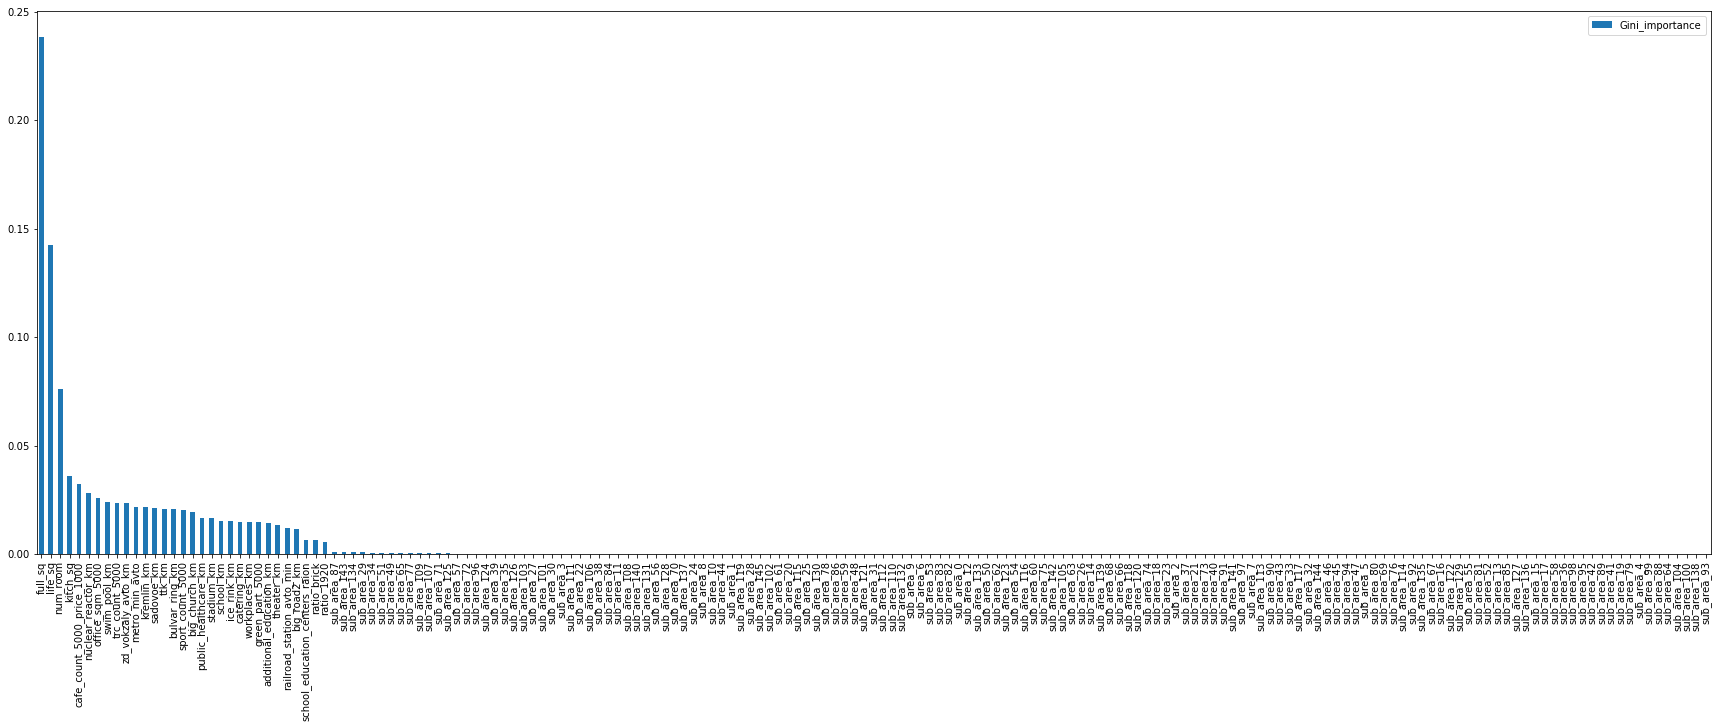

In [29]:
%matplotlib inline
from matplotlib import pyplot as plt
#do code to support model
#"data" is the X dataframe and model is the SKlearn object

feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(test.columns, x.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini_importance'})
importances.sort_values(by='Gini_importance',ascending=False).plot(kind='bar',figsize=(30,10))
plt.savefig('Gini_importance_sub_area.png')

/Users/mac/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


<function matplotlib.pyplot.show>

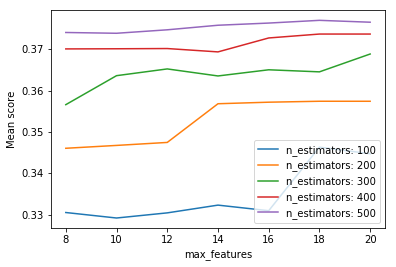

In [30]:
scores = [x[1] for x in para_search.grid_scores_]
scores = np.array(scores).reshape(len(n_estimators), len(max_features))

for ind, i in enumerate(n_estimators):
    plt.plot(max_features, scores[ind], label='n_estimators: ' + str(i))

plt.legend()
plt.xlabel('max_features')
plt.ylabel('Mean score')
plt.savefig('grid_search_sub_area.png')
plt.show


In [134]:
pickle.dump(para_search, output)

NameError: name 'output' is not defined

In [ ]:
#L.append(total.columns[12])

#L.extend(total.columns[15:19])



